In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2-Layer Neural Network Class

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [145]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = np.random.rand(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = np.random.rand(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1)
    z1 = self.sigmoid(a1)
    a2 = np.dot(z1, W2)
    z2 = self.softmax(a2)
    return z2

  def loss(self, x, t):
    y = self.predict(x)
    return self.cross_entropy_error(y,t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
    accuracy = np.sum(y == t) / (1. * x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    f = lambda W: self.loss(x, t)
    grads = {}
    grads['W1'] = self.numerical_diff(f, self.params['W1'])
    grads['b1'] = self.numerical_diff(f, self.params['b1'])
    grads['W2'] = self.numerical_diff(f, self.params['W2'])
    grads['b2'] = self.numerical_diff(f, self.params['b2'])
    return grads

  def numerical_diff(self, f, w):
    delta = 0.0001
    grad = np.zeros_like(w)
    for idx, ele in np.ndenumerate(w):
      w[idx] += delta
      f1 = f(w)
      w[idx] -= 2. * delta
      f2 = f(w)
      grad[idx] = np.mean(f1 - f2) / (2. * delta)
      w[idx] += delta
    print("End")
    return grad

  def cross_entropy_error(self, y, t):
    delta = 0.0001
    if y.ndim == 1:
      return -np.sum(t * np.log(y + delta))
    return -np.sum(t * np.log(y + delta), axis=1) / y.shape[0]

  def sigmoid(self, a):
    return 1. / (1. + np.exp(-a))

  def softmax(self, a):
    C = np.max(a, axis=1)
    exp_a = np.exp(a - C.reshape(-1, 1))
    sum_exp_a = np.sum(exp_a, axis=1)
    return exp_a / sum_exp_a.reshape(-1, 1)

In [146]:
x = np.random.rand(100, 784)

In [147]:
X, y = mnist.data.values, mnist.target.to_numpy(dtype="int")

In [148]:
cnt = np.unique(y)
y_ = np.zeros((y.shape[0], np.max(y) + 1))
y_[np.arange(y.shape[0]),y] = 1

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1)

In [150]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [151]:
y_train.shape

(63000, 10)

In [160]:
iters_num = 50
batch_size = 100
train_size = X_train.shape[0]
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  X_batch = X_train[batch_mask]
  y_batch = y_train[batch_mask]
  print("index: "+str(i))
  grad = network.numerical_gradient(X_batch, y_batch)

  for key in ("W1", "b1", "W2", "b2"):
    network.params[key] -= learning_rate * grad[key]
  loss = network.loss(X_batch, y_batch)
  train_loss_list.append(loss)

index: 0
End
End
End
End
index: 1
End
End
End
End
index: 2
End
End
End
End
index: 3
End
End
End
End
index: 4
End
End
End
End
index: 5
End
End
End
End
index: 6
End
End
End
End
index: 7
End
End
End
End
index: 8
End
End
End
End
index: 9
End
End
End
End
index: 10
End
End
End
End
index: 11
End
End
End
End
index: 12
End
End
End
End
index: 13
End
End
End
End
index: 14
End
End
End
End
index: 15
End
End
End
End
index: 16
End
End
End
End
index: 17
End
End
End
End
index: 18
End
End
End
End
index: 19
End
End
End
End
index: 20
End
End
End
End
index: 21
End
End
End
End
index: 22
End
End
End
End
index: 23
End
End
End
End
index: 24
End
End
End
End
index: 25
End
End
End
End
index: 26
End
End
End
End
index: 27
End
End
End
End
index: 28
End
End
End
End
index: 29
End
End
End
End
index: 30
End
End
End
End
index: 31
End
End
End
End
index: 32
End
End
End
End
index: 33
End
End
End
End
index: 34
End
End
End
End
index: 35
End
End
End
End
index: 36
End
End
End
End
index: 37
End
End
End
End
index: 38
End
End
End


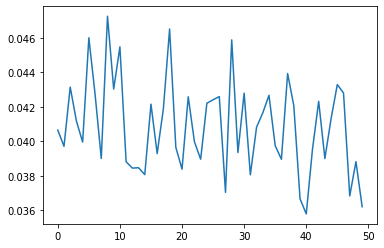

In [163]:
train_loss_np = np.mean(train_loss_list, axis=1)
plt.plot(np.arange(50), train_loss_np)